In [1]:
#%% Imports
import os
import shutil
import nibabel as nib
import numpy as np
import random
from glob import glob
from scipy import ndimage
from nilearn.image import resample_to_img, resample_img
from nilearn.masking import compute_background_mask, compute_epi_mask
from nilearn.plotting import plot_roi, plot_epi

/home/uziel/miniconda2/envs/diss/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Set working directory
os.chdir('/home/uziel/DISS')

In [3]:
# load prediction
root = './milestones/DM_V1/output_DM_V1/predictions/trainSession_DM_V1/predictions'
root_2 = './data/ISLES2017/training'
segms = glob(os.path.join(root, '*Segm.nii.gz'))
prob_maps_class0 = glob(os.path.join(root, '*ProbMapClass0.nii.gz'))
prob_maps_class1 = glob(os.path.join(root, '*ProbMapClass1.nii.gz'))
segms_img = []

# resize its prediction for final result validation
for i in range(len(segms)):
    # Find subject that contains the code in pred.
    subject = sorted([y
                      for x in os.walk(root_2)
                      for y in glob(os.path.join(x[0], '*'))
                      if segms[i].split('_')[-2] in y
                     ])[0].split('/')[-2]
    
    subject_channels = sorted([y
                               for x in os.walk(os.path.join(root_2, subject))
                               for y in glob(os.path.join(x[0], '*MR_*.nii'))
                               if '4DPWI' not in y
                              ])
    
    original_img = nib.load(subject_channels[0])
    
    # load prediction
    pred = nib.load(segms[i])
    pmap_0 = nib.load(prob_maps_class0[i])
    pmap_1 = nib.load(prob_maps_class1[i])
    
    # Upsample to original size
    pred = resample_img(pred,
                        original_img.affine,
                        original_img.shape,
                        interpolation='nearest')
    pmap_0 = resample_img(pmap_0,
                          original_img.affine,
                          original_img.shape,
                          interpolation='continuous')
    pmap_1 = resample_img(pmap_1,
                          original_img.affine,
                          original_img.shape,
                          interpolation='continuous')

    segms_img.append([subject_channels, pred, pmap_0, pmap_1])   

/home/uziel/anaconda2/envs/diss/lib/python2.7/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


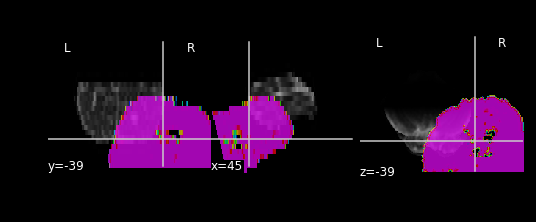

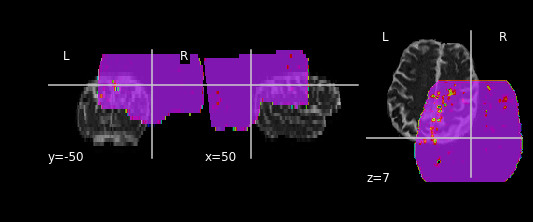

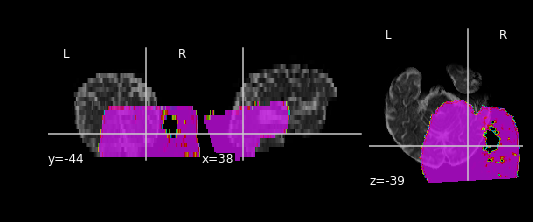

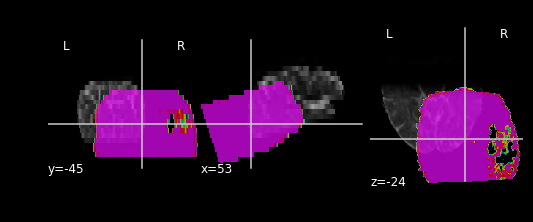

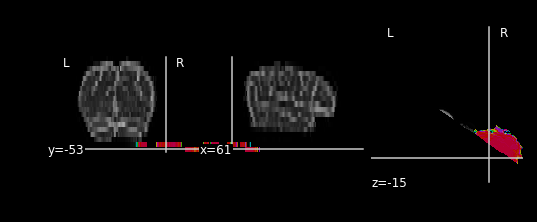

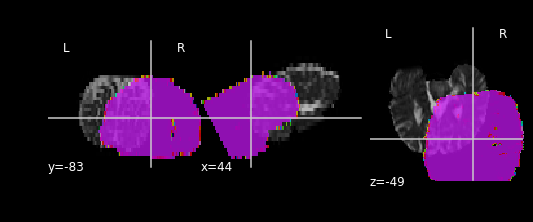

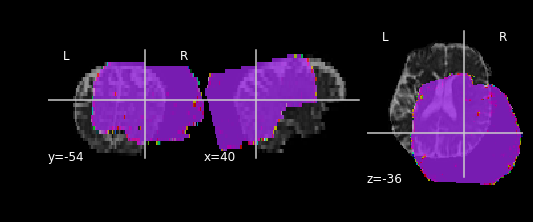

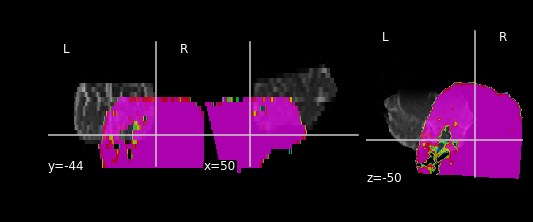

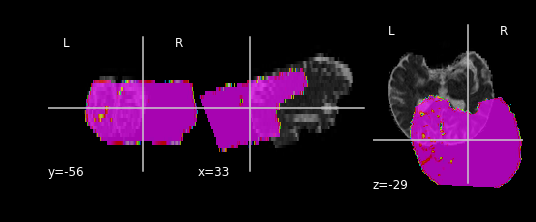

In [4]:
for subject_channels, pred, pmap_0, pmap_1 in segms_img:
    plot_roi(pmap_0, subject_channels[0])

/home/uziel/anaconda2/envs/diss/lib/python2.7/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


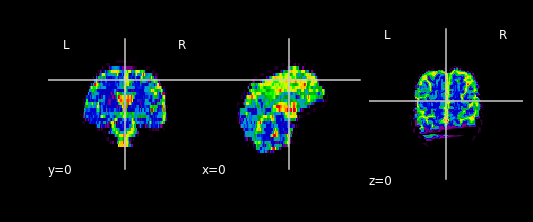

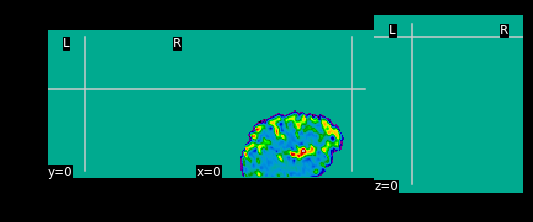

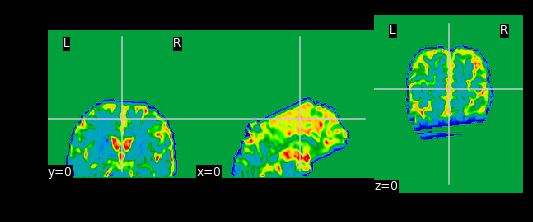

In [3]:
# TEST
# Compare original image and processed image when resampled back
original_img = nib.load('/home/uziel/DISS/data/ISLES2017/training/training_10/VSD.Brain.XX.O.MR_ADC.128021/VSD.Brain.XX.O.MR_ADC.128021.nii')
processed_img = nib.load('/home/uziel/DISS/data_processed/ISLES2017/training/1/VSD.Brain.XX.O.MR_ADC.128021.nii.gz')

# Resample processed_img to original size
resampled_img = resample_img(processed_img,
                             2*processed_img.affine/3,
                             [3*x/2 for x in processed_img.shape],
                             interpolation='continuous')
# Plot differences
#plot_roi(resampled_img, original_img, cut_coords = (0,0,0))
#plot_roi(processed_img, original_img, cut_coords = (0,0,0))
#plot_roi(processed_img, resampled_img, cut_coords = (0,0,0))
plot_epi(original_img,cut_coords = (0,0,0))
plot_epi(processed_img,cut_coords = (0,0,0))
plot_epi(resampled_img,cut_coords = (0,0,0))


/home/uziel/miniconda2/envs/diss/lib/python2.7/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/uziel/miniconda2/envs/diss/lib/python2.7/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


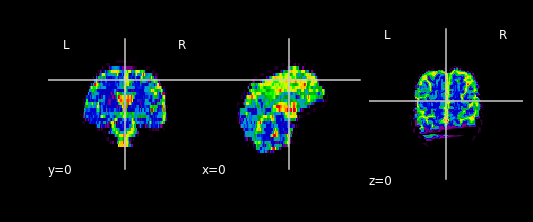

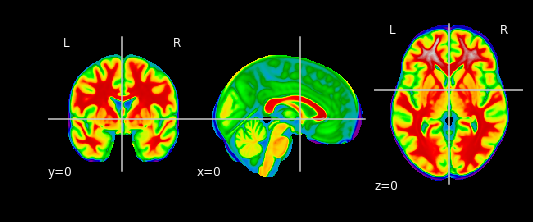

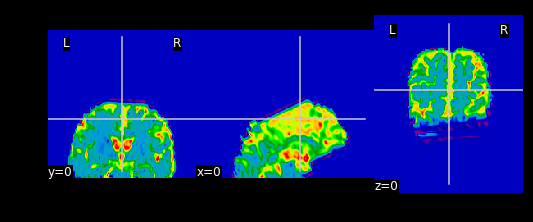

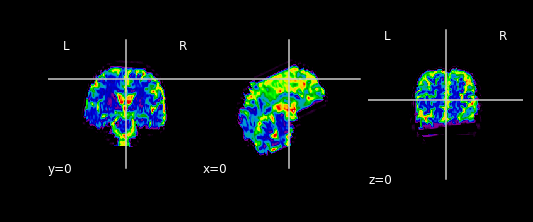

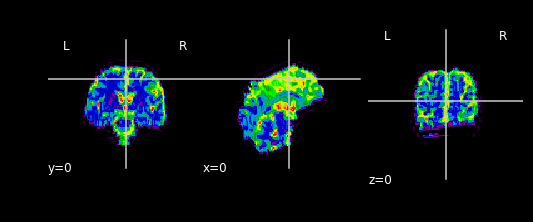

In [3]:
# TEST
# Compare original image and processed image when resampled back
original_img = nib.load('/home/uziel/DISS/data/ISLES2017/training/training_10/VSD.Brain.XX.O.MR_ADC.128021/VSD.Brain.XX.O.MR_ADC.128021.nii')
template = nib.load('/home/uziel/DISS/data/MNI152_T1_1mm_brain.nii.gz')

# Resample processed_img to original size
resampled_img_1 = resample_to_img(original_img, template)
# resample image to two thirds of its size (allows for faster and less memory need)
#resampled_img = resample_img(resampled_img,
#                             3*resampled_img.affine/2, [2*x/3 for x in resampled_img.shape],
#                             interpolation='nearest')
resampled_img_2 = resample_img(original_img, template.affine[:3,:3])
resampled_img_3 = resample_img(original_img, template.affine[:3,:3]/0.5)

plot_epi(original_img, cut_coords=(0,0,0))
plot_epi(template, cut_coords=(0,0,0))
plot_epi(resampled_img_1, cut_coords=(0,0,0))
plot_epi(resampled_img_2, cut_coords=(0,0,0))
plot_epi(resampled_img_3, cut_coords=(0,0,0))